Create a consistent color map for figures to show pyloric fitness, trajectories with labeled neurons, and more

Conventions:

Red, Yellow, Green: HP success or indicators 
Blue, White: Pyloricness or fitness indicators
Purple,Pink (viola cmasher): parameter flow and nullclines

In [ ]:
import numpy as np
import matplotlib as m
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
import cmasher #pip installed on earlier step

In [3]:
#define a set of colors for use
viridian = '#277C5E'
xanthous = '#F8AB25'
new_xanthous = '#F6AE2D'
flame = '#E46A3A'
new_flame = '#F26419'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'

If Blues is going to be my colormap for HP-agnostic averages, then Oranges will be the base for the pyloric fitness maps, but with specific signifiers of low fitness

In [33]:
# par1min = -5
# par1max = 25
# par1step = .05
# par2min = -20
# par2max = 10
# par2step = .05

par1min = -16
par1max = 16
par1step = .1
par2min = -16
par2max = 16
par2step = .1

# # # which goes an extra for each dimension
par1res = np.arange(par1min,par1max+par1step,par1step)
par2res = np.arange(par2min,par2max+par2step,par2step)
# par1res = np.arange(par1min,par1max,par1step)
# par2res = np.arange(par2min,par2max,par2step)

def get_pyloric_slice(indiv,high_res=False):
    if high_res:
        pyloricslice = np.loadtxt('../Cpp/Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice_highres.dat'%indiv).reshape((len(par1res),len(par2res)))
    else:
        pyloricslice = np.loadtxt('../Cpp/Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice.dat'%indiv).reshape((len(par1res),len(par2res)))
    pyloricslice = np.swapaxes(pyloricslice,1,0)
    return pyloricslice

def get_avgs_slice(indiv):
    avgs_slice = np.loadtxt('../Cpp/Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage.dat'%indiv).reshape((len(par1res),len(par2res),3))
    avgs_slice = np.swapaxes(avgs_slice,0,1)
    return avgs_slice

pyloric = get_pyloric_slice(99,False)
avgs = get_avgs_slice(99)

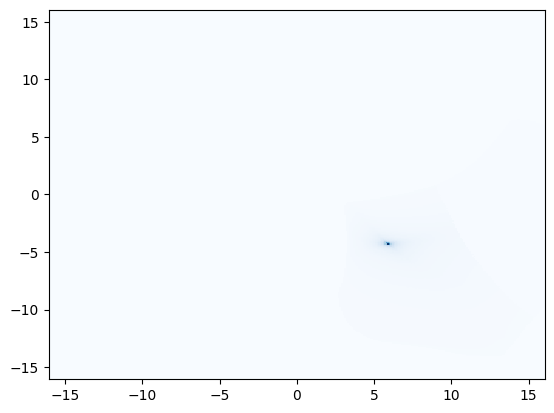

In [45]:
plt.pcolormesh(par1res,par2res,pyloric,cmap='Blues')

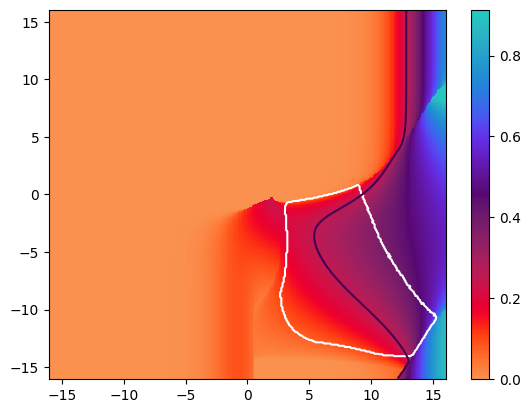

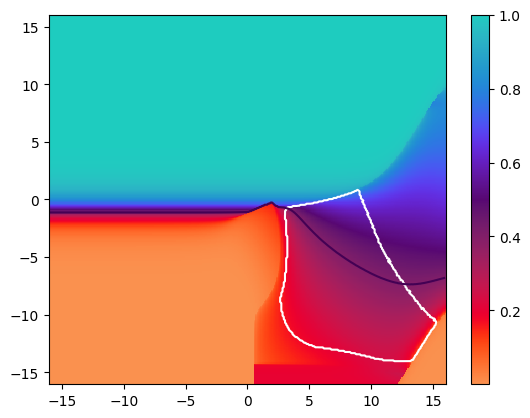

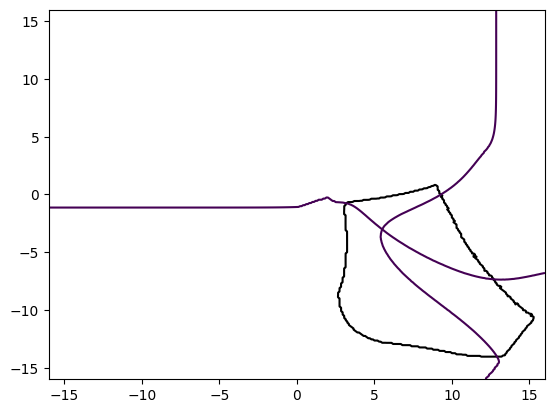

In [49]:
# B1 = 0.193246
B1 = 0.25 
# B3 = 0.306473
B3 = 0.4
plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap=cmasher.guppy)
plt.colorbar()
plt.contour(par1res,par2res,pyloric,levels=[.3],colors='w')
plt.contour(par1res,par2res,avgs[:,:,0],levels=[B1])
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap=cmasher.guppy)
plt.colorbar()
plt.contour(par1res,par2res,pyloric,levels=[.3],colors='w')
plt.contour(par1res,par2res,avgs[:,:,2],levels=[B3])
plt.show()
plt.contour(par1res,par2res,pyloric,levels=[.3],colors='k')
plt.contour(par1res,par2res,avgs[:,:,0],levels=[B1])
plt.contour(par1res,par2res,avgs[:,:,2],levels=[B3])
plt.show()